# Mobily Financial Analysis

This notebook performs a comprehensive financial analysis of Mobily Saudi Company data, including growth analysis, profitability ratios, financial position metrics, and visualizations.

## Importing Libraries 

In [2]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Loading and Exploration

In [3]:
# Load the Mobily raw data from the CSV file
mobily_raw_data = pd.read_csv('mobily__data.csv')

# Display the first few rows to understand the data structure
mobily_raw_data.head()

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,Mobily,Telecommunications,13449974,31183,967013,39262461,25511111
1,2020,Mobily,Telecommunications,14046168,783254,1366517,38415896,23970669
2,2021,Mobily,Telecommunications,14834056,1071541,1667784,39363908,24167662
3,2022,Mobily,Telecommunications,15717415,1656940,2328016,38178280,21819745
4,2023,Mobily,Telecommunications,16762681,2231977,2977256,38817134,21194527


In [4]:
# Get a summary of the dataset including data types and non-null counts
mobily_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   6 non-null      int64 
 1   Company_Name           6 non-null      object
 2   Sector                 6 non-null      object
 3   Revenue_SAR            6 non-null      int64 
 4   Net_Income_SAR         6 non-null      int64 
 5   Operating_Income_SAR   6 non-null      int64 
 6   Total_Assets_SAR       6 non-null      int64 
 7   Total_Liabilities_SAR  6 non-null      int64 
dtypes: int64(6), object(2)
memory usage: 516.0+ bytes


## Data Preparation

Note: Gross Profit was excluded from the analysis due to the absence of a clearly disclosed cost of revenue structure in Mobily’s financial statements.

In [5]:
# Sort the data by year to ensure chronological order
mobily_raw_data = mobily_raw_data.sort_values(by='Year').reset_index(drop=True)

# Define the numeric columns that need to be converted
numeric_cols = ['Revenue_SAR', 'Net_Income_SAR','Operating_Income_SAR','Total_Assets_SAR', 'Total_Liabilities_SAR']

# Convert the specified columns to numeric type, coercing errors to NaN
mobily_raw_data[numeric_cols] = mobily_raw_data[numeric_cols].apply(pd.to_numeric, errors='coerce').astype(float)

# Display the prepared data
mobily_raw_data

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,Mobily,Telecommunications,13449974.0,31183.0,967013.0,39262461.0,25511111.0
1,2020,Mobily,Telecommunications,14046168.0,783254.0,1366517.0,38415896.0,23970669.0
2,2021,Mobily,Telecommunications,14834056.0,1071541.0,1667784.0,39363908.0,24167662.0
3,2022,Mobily,Telecommunications,15717415.0,1656940.0,2328016.0,38178280.0,21819745.0
4,2023,Mobily,Telecommunications,16762681.0,2231977.0,2977256.0,38817134.0,21194527.0
5,2024,Mobily,Telecommunications,18206447.0,3106848.0,3530417.0,38515028.0,19639536.0


In [6]:
# Create a copy of the raw data for analysis to avoid modifying the original
mobily_new_data = mobily_raw_data.copy()

## Growth Analysis

In [7]:
# Calculate Year-over-Year Growth for Revenue
mobily_new_data['Revenue_Growth_%'] = mobily_new_data['Revenue_SAR'].pct_change() * 100

# Define a function to calculate Compound Annual Growth Rate (CAGR)
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

# Calculate and display the CAGR for Revenue
cagr_revenue = calculate_cagr(mobily_new_data['Revenue_SAR'].iloc[0], mobily_new_data['Revenue_SAR'].iloc[-1], len(mobily_new_data)-1)
print(f"Revenue CAGR: {cagr_revenue:.2f}%")

Revenue CAGR: 6.24%


## Profitability Ratios

In [8]:
# Calculate Operating Margin as a percentage
mobily_new_data['Operating_Margin_%'] = (mobily_new_data['Operating_Income_SAR'] / mobily_new_data['Revenue_SAR']) * 100

# Calculate Net Profit Margin as a percentage
mobily_new_data['Net_Profit_Margin_%'] = (mobily_new_data['Net_Income_SAR'] / mobily_new_data['Revenue_SAR']) * 100

# Display the profitability ratios
print(mobily_new_data[['Year', 'Operating_Margin_%', 'Net_Profit_Margin_%']])

   Year  Operating_Margin_%  Net_Profit_Margin_%
0  2019            7.189702             0.231844
1  2020            9.728753             5.576282
2  2021           11.242940             7.223520
3  2022           14.811698            10.542064
4  2023           17.761216            13.315155
5  2024           19.391027            17.064549


## Financial Position

In [9]:
# Calculate Leverage Ratio: Liabilities to Assets as a percentage
mobily_new_data['Liabilities_to_Assets_Ratio'] = (mobily_new_data['Total_Liabilities_SAR'] / mobily_new_data['Total_Assets_SAR']) * 100

# Calculate Asset Turnover Ratio
mobily_new_data['Asset_Turnover_Ratio'] = mobily_new_data['Revenue_SAR'] / mobily_new_data['Total_Assets_SAR']

# Display the financial position ratios
print(mobily_new_data[['Year', 'Liabilities_to_Assets_Ratio', 'Asset_Turnover_Ratio']])

   Year  Liabilities_to_Assets_Ratio  Asset_Turnover_Ratio
0  2019                    64.975833              0.342566
1  2020                    62.397787              0.365634
2  2021                    61.395484              0.376844
3  2022                    57.152247              0.411685
4  2023                    54.600958              0.431837
5  2024                    50.991878              0.472710


## Visualizations

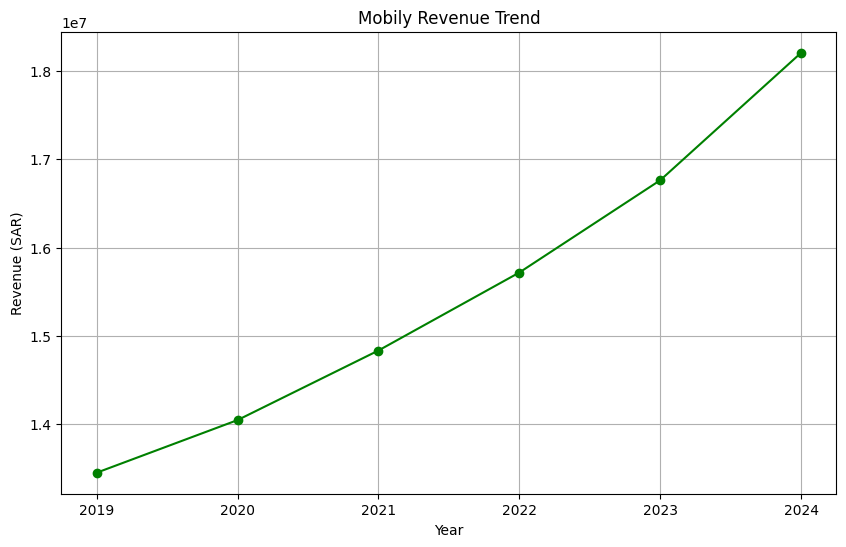

In [10]:
# Visualize Revenue Trend over Years
plt.figure(figsize=(10, 6))
plt.plot(mobily_new_data["Year"], mobily_new_data["Revenue_SAR"], marker='o', linestyle='-', color='green')
plt.title("Mobily Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Revenue (SAR)")
plt.grid(True)
plt.show()

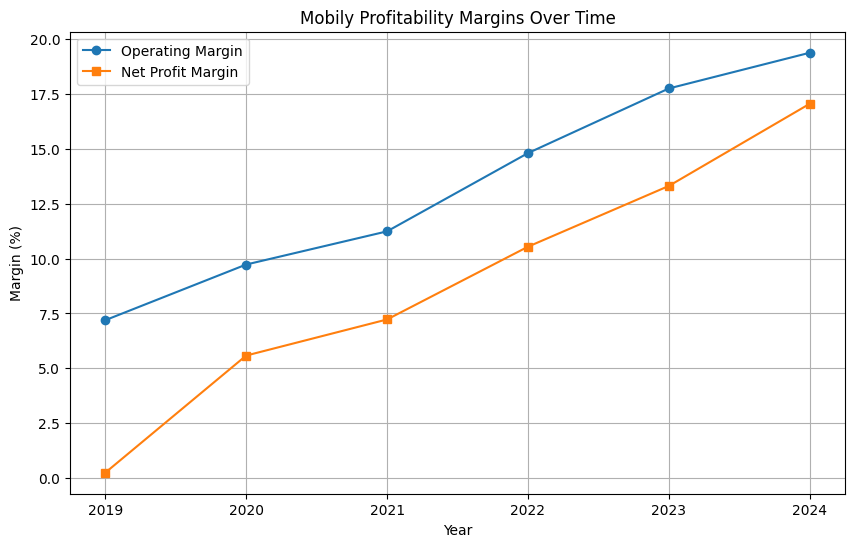

In [11]:
# Visualize Profitability Margins over Years
plt.figure(figsize=(10, 6))
plt.plot(mobily_new_data["Year"], mobily_new_data["Operating_Margin_%"], label="Operating Margin", marker='o')
plt.plot(mobily_new_data["Year"], mobily_new_data["Net_Profit_Margin_%"], label="Net Profit Margin", marker='s')
plt.legend()
plt.title("Mobily Profitability Margins Over Time")
plt.xlabel("Year")
plt.ylabel("Margin (%)")
plt.grid(True)
plt.show()

## Saving Analysis Results

In [12]:
# Save the analysis results to a CSV file
mobily_new_data.to_csv('mobily_analysis_results.csv', index=False)
print("Analysis results saved to 'mobily_analysis_results.csv'")

Analysis results saved to 'mobily_analysis_results.csv'


## Conclusion

This notebook has provided a comprehensive analysis of Mobily's financial data, including growth metrics, profitability ratios, financial position, and visualizations. The results have been saved for further use.